# Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn

Importing packages

In [92]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

Creating custom dataset

In [ ]:
X, y = make_classification(n_samples= 20000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [94]:
X.shape, y.shape
print(y)

[0 1 0 ... 0 1 0]


Splitting data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [96]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((15000, 15), (15000,), (5000, 15), (5000,))

SGD classifier

In [97]:
# alpha : float
# eta0 : double

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [98]:
# Fitting the data
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.46, NNZs: 15, Bias: -0.141371, T: 15000, Avg. loss: 0.493205
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 15, Bias: -0.241102, T: 30000, Avg. loss: 0.433143
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.66, NNZs: 15, Bias: -0.329582, T: 45000, Avg. loss: 0.417809
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.71, NNZs: 15, Bias: -0.408925, T: 60000, Avg. loss: 0.409655
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.74, NNZs: 15, Bias: -0.480692, T: 75000, Avg. loss: 0.404084
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.76, NNZs: 15, Bias: -0.546294, T: 90000, Avg. loss: 0.400013
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 0.78, NNZs: 15, Bias: -0.604245, T: 105000, Avg. loss: 0.397020
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 0.80, NNZs: 15, Bias: -0.655369, T: 120000, Avg. loss: 0.394488
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 0.81, NNZs: 15, Bias: -0.702031, T: 135000, Avg. loss: 0.3924

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [99]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[ 0.09906873, -0.00808999,  0.37682351,  0.10013691, -0.12650529,
          0.12357149,  0.10812407, -0.22310203, -0.00733888, -0.10540587,
         -0.40096398,  0.06300479,  0.39777512, -0.09107691, -0.42308821]]),
 (1, 15),
 array([-0.94270481]))

Implement Logistic Regression with L2 regularization Using SGD: without using sklearn 

Initialize weights

In [100]:
def initialize_weights(row_vector):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights as 1d array consisting of all zeros similar to the dimensions of row_vector
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros_like(row_vector)
    b = 0 
    
    return w, b

In [101]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =', w)
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


Compute sigmoid
$sigmoid(z)= 1/(1+exp(-z))$

In [103]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    return 1/(1+np.exp(-z))

Compute loss

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [105]:
def logloss(y_true,y_pred):
    
    n = np.array(y_true).size  # we assume that the y_true has shape (0, n)
    loss = (-1/n)*np.sum(y_true*(np.log10(y_pred))+(1 - y_true)*np.log10(1 - y_pred))
        
    return loss

Compute gradient w.r.to  'w'

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [107]:

def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    
    dw = x*(y-sigmoid(np.dot(w.transpose(), x) + b )) - (alpha/N)*w
    
    return dw

Compute gradient w.r.to 'b'

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [109]:
#sb should be a scalar value
def gradient_db(x,y,w,b):
    
    '''In this function, we will compute gradient w.r.to b '''
    db = y - sigmoid(np.dot(w.transpose(), x) + b)
    
    return db

In [111]:
# prediction function used to compute predicted_y given the dataset X
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        predict.append(sigmoid(np.dot(w,X[i])+b))

    return np.array(predict)


In [112]:
w, b = initialize_weights(X_train[0])
prediction = pred(w,b,X)
print((prediction.shape))

(20000,)


Implementing logistic regression

In [113]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    # for every epoch
        # for every data point(X_train,y_train)
           #compute gradient w.r.to w (call the gradient_dw() function)
           #compute gradient w.r.to b (call the gradient_db() function)
           #update w, b
        # predict the output of x_train [for all data points in X_train] using pred function with updated weights
        #compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        # predict the output of x_test [for all data points in X_test] using pred function with updated weights
        #compute the loss between predicted and actual values (call the loss function)
        # store all the test loss values in a list
        # you can also compare previous loss and current loss, if loss is not updating then stop the process 
        # you have to return w,b , train_loss and test loss
          
    train_loss = []
    test_loss = []
    w, b = initialize_weights(X_train[0]) # Initialize the weights
    
    #write your code to perform SGD
    
    epochnumber = 0
    N = X_train.shape[0]
    
    #creating set of arrays into which dw will be appended
    dw = np.zeros((1,X_train.shape[1]))
    db = np.zeros((1,1))
    
    while epochnumber < epochs: #restricting the number of epochs
        #calculating the differential of weight vector
        #calculating differential of intercept
        for i in range(len(X_train)):
            dw = gradient_dw(X_train[i], y_train[i], w, b, alpha, N)
            db = gradient_db(X_train[i], y_train[i], w, b)

            w = w + eta0*dw #applying gradient descent equation to weight vector
            b = b + eta0*db #applying gradient descent equation to the intercept
        
        y_train_pred = pred(w, b, X_train) #calculating the new y_train_pred based on the updated weightvector and intercept
        flogloss_train = logloss(y_train, y_train_pred)#logloss calcualted by comparing y_train and y_train_pred based on updated weight vector and intercept
        train_loss.append(flogloss_train) #appending train logloss value
        
       #Using w for X_test to obtain y_test_pred
        y_test_pred = pred(w,b, X_test) #calculating the new y_test_pred
        flogloss_test = logloss(y_test, y_test_pred) #logloss calcualted by comparing y_train and y_train_pred
        test_loss.append(flogloss_test) #appending train logloss value
        
        epochnumber += 1
    return w, b, train_loss, test_loss

In [123]:
alpha=0.001
eta0=0.0001
N=len(X_train)
epochs=50
w,b,train_loss,test_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

In [124]:
#print the value of weights w and bias b
print(w)
print(b)

[ 0.11567369  0.02744738  0.40758246  0.09951754 -0.13691863  0.11292758
  0.13466661 -0.26169607  0.00300568 -0.10363458 -0.42946923  0.09149915
  0.43181711 -0.11424359 -0.45699145]
-1.1459738744199035


In [125]:
# Results from the implemented sgd and found the optimal weights and intercept

w-clf.coef_, b-clf.intercept_

(array([[ 0.01660496,  0.03553737,  0.03075894, -0.00061937, -0.01041335,
         -0.01064391,  0.02654254, -0.03859404,  0.01034456,  0.00177128,
         -0.02850526,  0.02849437,  0.03404199, -0.02316668, -0.03390324]]),
 array([-0.20326907]))

Compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in order of 10^-2

In [126]:
#this grader function should return True
#the difference between custom weights and clf.coef_ should be less than or equal to 0.05 i.e. to the order of 10^-2
def differece_check_grader(w,b,coef,intercept):
    val_array=np.abs(np.array(w-coef))
    assert(np.all(val_array<=0.05))
    print('The custom weights are correct')
    return True

differece_check_grader(w,b,clf.coef_,clf.intercept_)   

The custom weights are correct


True

Plot train and test loss vs epochs

plot epoch number on X-axis and loss on Y-axis and make sure that the curve is converging

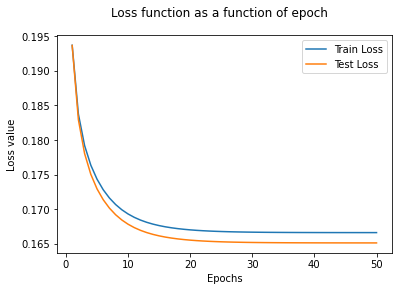

In [127]:
epochslist = list(range(1,epochs+1))

import matplotlib.pyplot as plt
plt.figure().suptitle('Loss function as a function of epoch')
plt.plot(epochslist, train_loss, label = "Train Loss")
plt.plot( epochslist, list(test_loss), label = "Test Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss value")
plt.show()
